# Pharmaceutical Sales Prediction of EDA and Forecasting

In [83]:
import warnings
warnings.filterwarnings("ignore")
#Data Manipulation and Treatment
import numpy as np
import pandas as pd
from datetime import datetime
#Plotting and Visualizations
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from scipy import stats
import itertools
#Scikit-Learn for Modeling
from sklearn import model_selection
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

# To load  the dataset 
The training dataset and store dataset

In [84]:
def str_to_date(date):
    return datetime.strptime(date, '%Y-%m-%d').date()

In [85]:
#The training Set
train_to_data = pd.read_csv(r"C:\Users\Genet Shanko\Desktop\Pharmaceutical_Sales_Prediction\Data\train.csv", sep=',', parse_dates=['Date'], date_parser=str_to_date,low_memory = False)
print(len(train_to_data))



#Additional Information on those stores 
store_data = pd.read_csv(r"C:\Users\Genet Shanko\Desktop\Pharmaceutical_Sales_Prediction\Data\store.csv" , low_memory = False)

1017209


In [86]:
train_to_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [87]:
train_to_data.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [88]:
train_to_data.dtypes,print ("The Train dataset has {} Rows and {} Variables".format(str(train_to_data.shape[0]),str(train_to_data.shape[1])))

The Train dataset has 1017209 Rows and 9 Variables


(Store                     int64
 DayOfWeek                 int64
 Date             datetime64[ns]
 Sales                     int64
 Customers                 int64
 Open                      int64
 Promo                     int64
 StateHoliday             object
 SchoolHoliday             int64
 dtype: object,
 None)

In [89]:
store_data.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [90]:
store_data.tail()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [91]:
store_data.dtypes ,print ("The Store dataset has {} Rows (which means unique Shops) and {} Variables".format(str(store_data.shape[0]),str(store_data.shape[1]))) 

The Store dataset has 1115 Rows (which means unique Shops) and 10 Variables


(Store                          int64
 StoreType                     object
 Assortment                    object
 CompetitionDistance          float64
 CompetitionOpenSinceMonth    float64
 CompetitionOpenSinceYear     float64
 Promo2                         int64
 Promo2SinceWeek              float64
 Promo2SinceYear              float64
 PromoInterval                 object
 dtype: object,
 None)

# Data Wrangling and Exploration:

### How many missing fields each variable has:

In [92]:
train_to_data.count(0)/train_to_data.shape[0] * 100

Store            100.0
DayOfWeek        100.0
Date             100.0
Sales            100.0
Customers        100.0
Open             100.0
Promo            100.0
StateHoliday     100.0
SchoolHoliday    100.0
dtype: float64

##### As showen above it can see that the the columns have got a good fill rate. it didn't need to do any change for the train set for now at least.

###### Deep Dive on Stores Closed (which means 0 customers and 0 sales) on Certain days:

In [93]:
print ()
print ("-Over those two years, {} is the number of times that different stores closed on given days.".format(train_to_data[(train_to_data.Open == 0)].count()[0]))
print ()
print ("-From those closed events, {} times occured because there was a school holiday. " .format(train_to_data[(train_to_data.Open == 0) & (train_to_data.SchoolHoliday == 1)&(train_to_data.StateHoliday == '0') ].count()[0]))
print ()
print ("-And {} times it occured because of either a bank holiday or easter or christmas.".format(train_to_data[(train_to_data.Open == 0) &
         ((train_to_data.StateHoliday == 'a') |
          (train_to_data.StateHoliday == 'b') | 
          (train_to_data.StateHoliday == 'c'))].count()[0]))

print ()
print ("-But interestingly enough, {} times those shops closed on days for no apparent reason when no holiday was announced. In fact, those closings were done with no pattern whatsoever and in this case from 2013 to 2015 at almost any month and any day.".format(train_to_data[(train_to_data.Open == 0) &
         (train_to_data.StateHoliday == "0")
         &(train_to_data.SchoolHoliday == 0)].count()[0]))
print ()


-Over those two years, 172817 is the number of times that different stores closed on given days.

-From those closed events, 3067 times occured because there was a school holiday. 

-And 30140 times it occured because of either a bank holiday or easter or christmas.

-But interestingly enough, 139610 times those shops closed on days for no apparent reason when no holiday was announced. In fact, those closings were done with no pattern whatsoever and in this case from 2013 to 2015 at almost any month and any day.



In [94]:
train_to_data=train_to_data.drop(train_to_data[(train_to_data.Open == 0) & (train_to_data.Sales == 0)].index)

In [95]:
train_to_data= train_to_data.reset_index(drop=True) #making sure the indexes are back to [0,1,2,3 etc.] 

In [96]:
print ("Our new training set has now {} rows ".format(train_to_data.shape[0]))

Our new training set has now 844392 rows 


## What about the distribution of Sales and Customers in the train set? Any outliers?

### 1) Sales:

In [97]:
train_to_data.Sales.describe() 
#we see here a minimum of 0 which means some stores even opened got 0 sales on some days.

count    844392.000000
mean       6955.514291
std        3104.214680
min           0.000000
25%        4859.000000
50%        6369.000000
75%        8360.000000
max       41551.000000
Name: Sales, dtype: float64

In [98]:
train_to_data=train_to_data.drop(train_to_data[(train_to_data.Open == 1) & (train_to_data.Sales == 0)].index)
train_to_data = train_to_data.reset_index(drop=True) 

{'Mean': 6955.959133664481, 'Median': 6369.0}

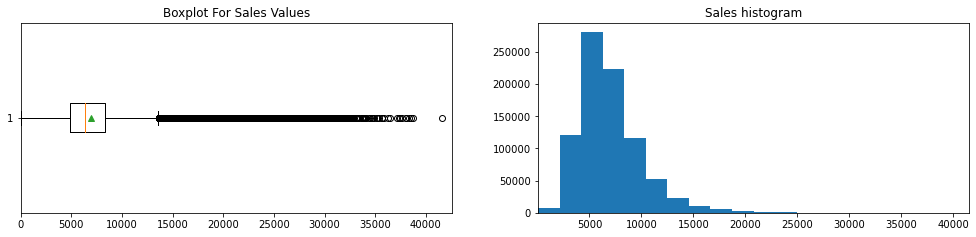

In [99]:
fig, axes = plt.subplots(1, 2, figsize=(17,3.5))
axes[0].boxplot(train_to_data.Sales, showmeans=True,vert=False)
axes[0].set_xlim(0,max(train_to_data["Sales"]+1000))
axes[0].set_title('Boxplot For Sales Values')
axes[1].hist(train_to_data.Sales, cumulative=False, bins=20)
axes[1].set_title("Sales histogram")
axes[1].set_xlim((min(train_to_data.Sales), max(train_to_data.Sales)))

{"Mean":np.mean(train_to_data.Sales),"Median":np.median(train_to_data.Sales)}

In [100]:
print ("{0:.2f}% of the time Rossman are actually having big sales day (considered outliers).".format(train_to_data[train_to_data.Sales>14000].count()[0]/train_to_data.shape[0]*100))
print ("{0:.2f}% of the time Rossman are actually having no sales at all.".format(train_to_data[train_to_data.Sales==0].count()[0]/train_to_data.shape[0]*100))

3.21% of the time Rossman are actually having big sales day (considered outliers).
0.00% of the time Rossman are actually having no sales at all.


In [101]:
train_to_data.Customers.describe()  

count    844338.000000
mean        762.777166
std         401.194153
min           8.000000
25%         519.000000
50%         676.000000
75%         893.000000
max        7388.000000
Name: Customers, dtype: float64

{'Mean': 762.777166253325, 'Median': 676.0}

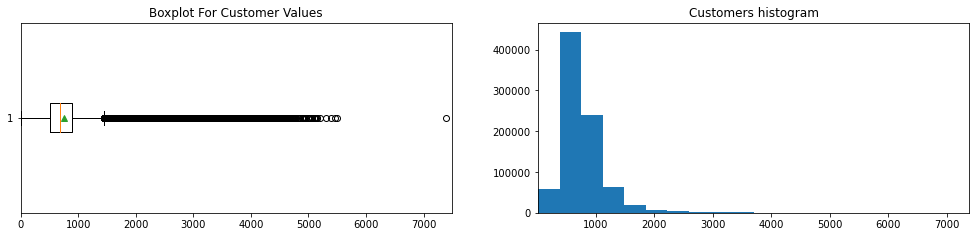

In [102]:
fig, axes = plt.subplots(1, 2, figsize=(17,3.5))
axes[0].boxplot(train_to_data.Customers, showmeans=True,vert=False)
axes[0].set_xlim(0,max(train_to_data["Customers"]+100))
axes[0].set_title('Boxplot For Customer Values')
axes[1].hist(train_to_data.Customers, cumulative=False, bins=20)
axes[1].set_title("Customers histogram")
axes[1].set_xlim((min(train_to_data.Customers), max(train_to_data.Customers)))

{"Mean":np.mean(train_to_data.Customers),"Median":np.median(train_to_data.Customers)}

In [103]:
print ("{0:.2f}% of the time Rossman are actually having customers more than usual (considered outliers).".format(train_to_data[train_to_data.Customers>1500].count()[0]/train_to_data.shape[0]*100))
print ("{0:.2f}% of the time Rossman are actually having no customers at all.".format(train_to_data[train_to_data.Customers==0].count()[0]/train_to_data.shape[0]*100))

4.37% of the time Rossman are actually having customers more than usual (considered outliers).
0.00% of the time Rossman are actually having no customers at all.


In [104]:
train_to_data[train_to_data.Customers>7000]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
825160,817,2,2013-01-22,27190,7388,1,1,0,0


In [105]:
stats.pearsonr(train_to_data.Customers, train_to_data.Sales)[0]

0.823551720200021

### A closer look at the Store Dataset:

In [106]:
store_data.count(0)/store_data.shape[0] * 100

Store                        100.000000
StoreType                    100.000000
Assortment                   100.000000
CompetitionDistance           99.730942
CompetitionOpenSinceMonth     68.251121
CompetitionOpenSinceYear      68.251121
Promo2                       100.000000
Promo2SinceWeek               51.210762
Promo2SinceYear               51.210762
PromoInterval                 51.210762
dtype: float64

### Let's start the cleansing process by order:
CompetitionDistance:

In [107]:
store_data[pd.isnull(store_data.CompetitionDistance)] 
#rows with missing values for Competition Distance, only 3 rows with null which makes sense since 99.73% is filled

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


Before deciding how to treat this,we know there are infinite ways of filling missing values.
The most common and simplistic approach is to fill it with either the mean or the median of this variable.
Let's quickly have a look at those metrics.

{'Mean': 5404.901079136691,
 'Median': 2325.0,
 'Standard Dev': 7659.7282732764415}

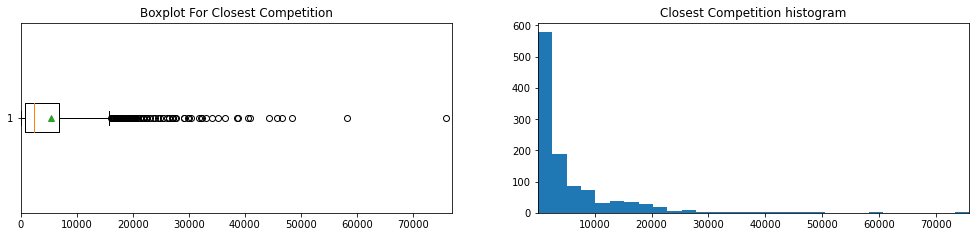

In [108]:
store_data_check_distribution=store_data.drop(store_data[pd.isnull(store_data.CompetitionDistance)].index)
fig, axes = plt.subplots(1, 2, figsize=(17,3.5))
axes[0].boxplot(store_data_check_distribution.CompetitionDistance, showmeans=True,vert=False,)
axes[0].set_xlim(0,max(store_data_check_distribution.CompetitionDistance+1000))
axes[0].set_title('Boxplot For Closest Competition')
axes[1].hist(store_data_check_distribution.CompetitionDistance, cumulative=False, bins=30)
axes[1].set_title("Closest Competition histogram")
axes[1].set_xlim((min(store_data_check_distribution.CompetitionDistance), max(store_data_check_distribution.CompetitionDistance)))
{"Mean":np.nanmean(store_data.CompetitionDistance),"Median":np.nanmedian(store_data.CompetitionDistance),"Standard Dev":np.nanstd(store_data.CompetitionDistance)}#That's what i thought, very different values, let's see why 

In [109]:
store_data['CompetitionDistance'].fillna(store_data['CompetitionDistance'].median(), inplace = True)

In [110]:
store_data.CompetitionOpenSinceMonth.fillna(0, inplace = True)
store_data.CompetitionOpenSinceYear.fillna(0,inplace=True)

In [111]:
store_data.Promo2SinceWeek.fillna(0,inplace=True)
store_data.Promo2SinceYear.fillna(0,inplace=True)
store_data.PromoInterval.fillna(0,inplace=True)

In [112]:
store_data.count(0)/store_data.shape[0] * 100

Store                        100.0
StoreType                    100.0
Assortment                   100.0
CompetitionDistance          100.0
CompetitionOpenSinceMonth    100.0
CompetitionOpenSinceYear     100.0
Promo2                       100.0
Promo2SinceWeek              100.0
Promo2SinceYear              100.0
PromoInterval                100.0
dtype: float64

In [113]:
#Left-join the train to the store dataset since .Why?
#Because you want to make sure you have all events even if some of them don't have their store information ( which shouldn't happen)
train_store_data = pd.merge(train_to_data, store_data, how = 'left', on = 'Store')
train_store_data.head() 
print ("The Train_Store dataset has {} Rows and {} Variables".format(str(train_store_data.shape[0]),str(train_store_data.shape[1]))) 

The Train_Store dataset has 844338 Rows and 18 Variables


## Store Type Analysis:

In [114]:
train_store_data['SalesperCustomer']=train_store_data['Sales']/train_store_data['Customers']

In [115]:
train_store_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,SalesperCustomer
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,9.482883
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",9.702400
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",10.126675
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0,9.342457
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0,8.626118


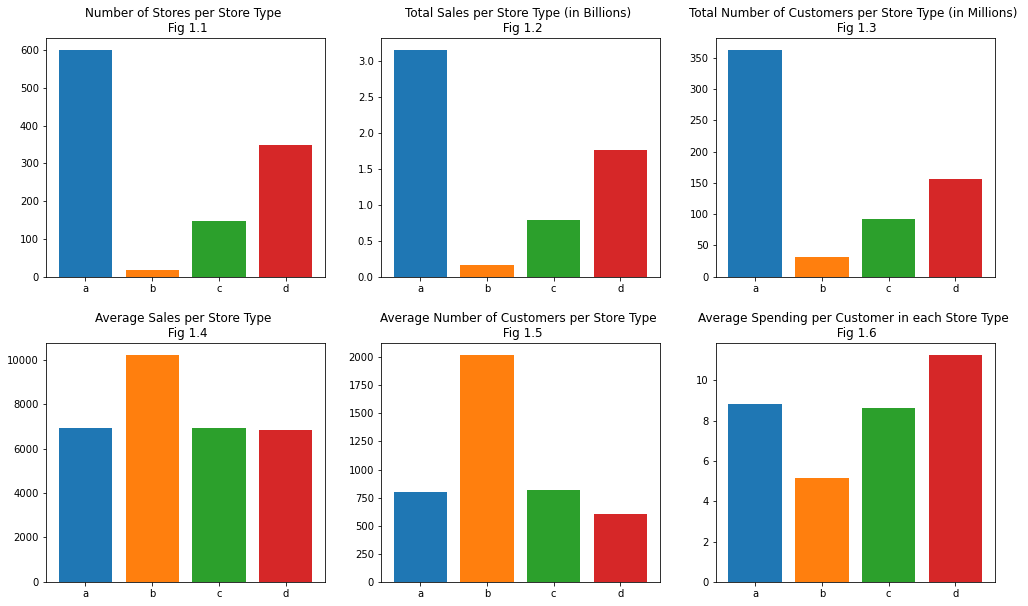

In [116]:
fig, axes = plt.subplots(2, 3,figsize=(17,10) )
palette = itertools.cycle(sns.color_palette(n_colors=4))
plt.subplots_adjust(hspace = 0.28)
#axes[1].train_Data_store.groupby(by="StoreType").count().Store.plot(kind='bar')
axes[0,0].bar(store_data.groupby(by="StoreType").count().Store.index,store_data.groupby(by="StoreType").count().Store,color=[next(palette),next(palette),next(palette),next(palette)])
axes[0,0].set_title("Number of Stores per Store Type \n Fig 1.1")
axes[0,1].bar(train_store_data.groupby(by="StoreType").sum().Sales.index,train_store_data.groupby(by="StoreType").sum().Sales/1e9,color=[next(palette),next(palette),next(palette),next(palette)])
axes[0,1].set_title("Total Sales per Store Type (in Billions) \n Fig 1.2")
axes[0,2].bar(train_store_data.groupby(by="StoreType").sum().Customers.index,train_store_data.groupby(by="StoreType").sum().Customers/1e6,color=[next(palette),next(palette),next(palette),next(palette)])
axes[0,2].set_title("Total Number of Customers per Store Type (in Millions) \n Fig 1.3")
axes[1,0].bar(train_store_data.groupby(by="StoreType").sum().Customers.index,train_store_data.groupby(by="StoreType").Sales.mean(),color=[next(palette),next(palette),next(palette),next(palette)])
axes[1,0].set_title("Average Sales per Store Type \n Fig 1.4")
axes[1,1].bar(train_store_data.groupby(by="StoreType").sum().Customers.index,train_store_data.groupby(by="StoreType").Customers.mean(),color=[next(palette),next(palette),next(palette),next(palette)])
axes[1,1].set_title("Average Number of Customers per Store Type \n Fig 1.5")

axes[1,2].bar(train_store_data.groupby(by="StoreType").sum().Sales.index,train_store_data.groupby(by="StoreType").SalesperCustomer.mean(),color=[next(palette),next(palette),next(palette),next(palette)])
axes[1,2].set_title("Average Spending per Customer in each Store Type \n Fig 1.6")
plt.show()

StoreType  Assortment
a          a             381
           c             221
b          a               7
           b               9
           c               1
c          a              77
           c              71
d          a             128
           c             220
Name: Assortment, dtype: int64

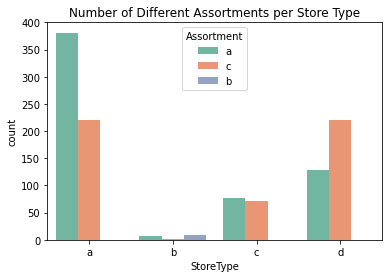

In [117]:
StoretypeXAssortment = sns.countplot(x="StoreType",hue="Assortment",order=["a","b","c","d"], data=store_data,palette=sns.color_palette("Set2", n_colors=3)).set_title("Number of Different Assortments per Store Type")
store_data.groupby(by=["StoreType","Assortment"]).Assortment.count()

In [118]:
train_store_data['Month']=train_store_data.Date.dt.month
train_store_data['Year']=train_store_data.Date.dt.year

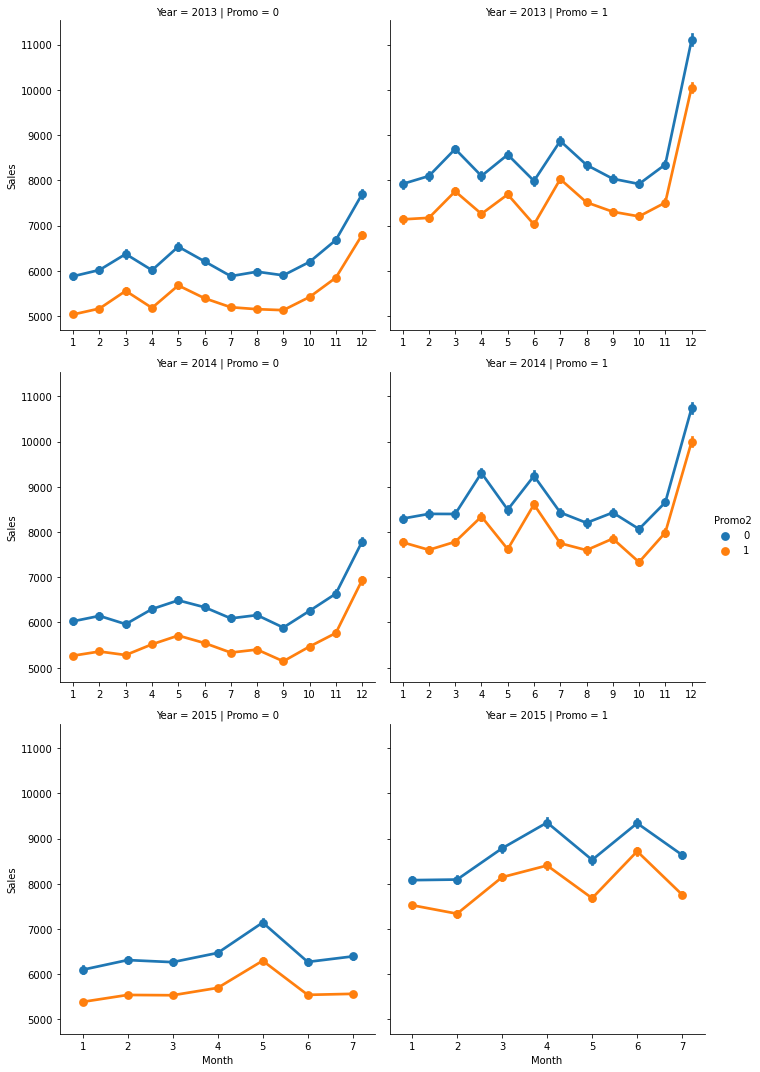

In [119]:
sns.factorplot(data = train_store_data, x ="Month", y = "Sales", 
               col = 'Promo', # per store type in cols
               hue = 'Promo2',
               row = "Year"
              ,sharex=False)

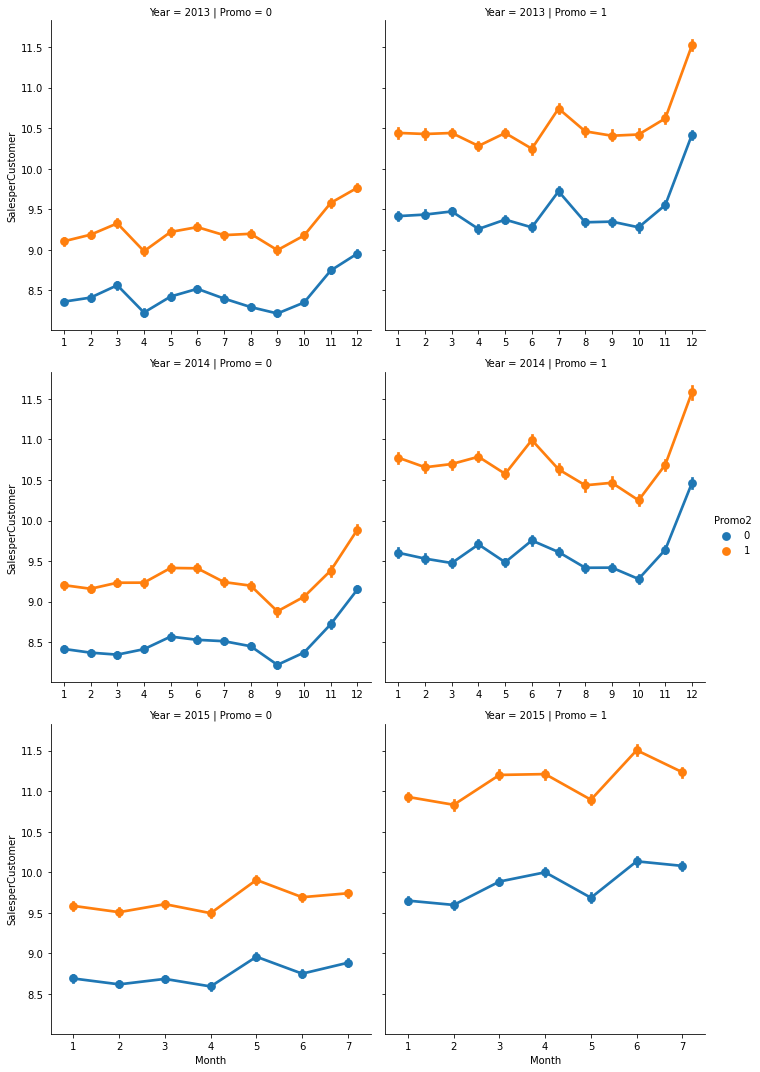

In [120]:
sns.factorplot(data = train_store_data, x ="Month", y = "SalesperCustomer", 
               col = 'Promo', # per store type in cols
               hue = 'Promo2',
               row = "Year"
              ,sharex=False)

In [121]:
Promotion impact as shown 

SyntaxError: invalid syntax (67266583.py, line 1)

In [ ]:
sns.factorplot(data = train_store_data, x ="DayOfWeek", y = "Sales",
                hue='Promo'
              ,sharex=False)

In [78]:
#Stores are opened on Sundays
print ("Number of Stores opened on Sundays:{}" .format(train_store_data[(train_store_data.Open == 1) & (train_store_data.DayOfWeek == 7)]['Store'].unique().shape[0]))

Number of Stores opened on Sundays:33


##### computional Dsiatance 

In [79]:
train_store_data['CompetitionDist_Cat']=pd.cut(train_store_data['CompetitionDistance'], 5)

In [80]:
train_store_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,SalesperCustomer,Sales_per_Customer,Month,Year,CompetitionDist_Cat
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,2008.0,0,0.0,0.0,0,9.482883,9.482883,7,2015,"(-55.84, 15188.0]"
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",9.702400,9.702400,7,2015,"(-55.84, 15188.0]"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",10.126675,10.126675,7,2015,"(-55.84, 15188.0]"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,2009.0,0,0.0,0.0,0,9.342457,9.342457,7,2015,"(-55.84, 15188.0]"
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,2015.0,0,0.0,0.0,0,8.626118,8.626118,7,2015,"(15188.0, 30356.0]"


In [81]:
train_store_data.groupby(by="CompetitionDist_Cat").Sales.mean(),train_store_data.groupby(by="CompetitionDist_Cat").Customers.mean()

(CompetitionDist_Cat
 (-55.84, 15188.0]     6957.360876
 (15188.0, 30356.0]    7041.604692
 (30356.0, 45524.0]    6471.923562
 (45524.0, 60692.0]    5980.114445
 (60692.0, 75860.0]    7775.446449
 Name: Sales, dtype: float64,
 CompetitionDist_Cat
 (-55.84, 15188.0]     771.345223
 (15188.0, 30356.0]    691.574605
 (30356.0, 45524.0]    680.101854
 (45524.0, 60692.0]    643.988246
 (60692.0, 75860.0]    914.574972
 Name: Customers, dtype: float64)